In [52]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [53]:
import requests
from io import StringIO

In [54]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data = StringIO(source)

In [55]:
poll_df = pd.read_csv(poll_data)

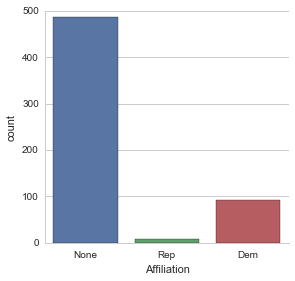

In [56]:
sns.factorplot('Affiliation',kind='count',data=poll_df)

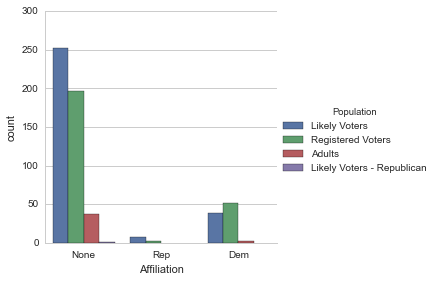

In [57]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [58]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)

In [59]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

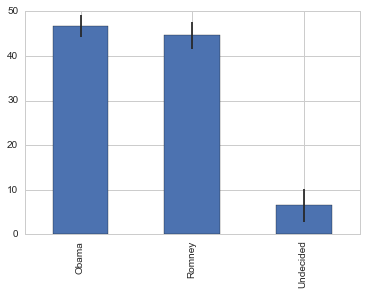

In [60]:
avg.plot(yerr=std,kind='bar',legend=False)

In [61]:
poll_avg = pd.concat([avg,std],axis=1)

In [62]:
poll_avg.columns = ['Average','STD']

In [63]:
poll_avg

,Average,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


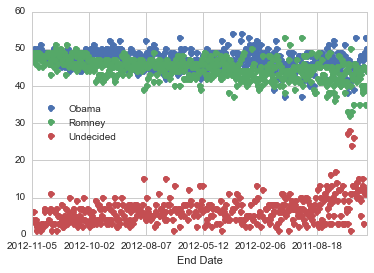

In [64]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [65]:
from datetime import datetime

In [66]:
poll_df['Difference'] = (poll_df.Obama-poll_df.Romney)/100

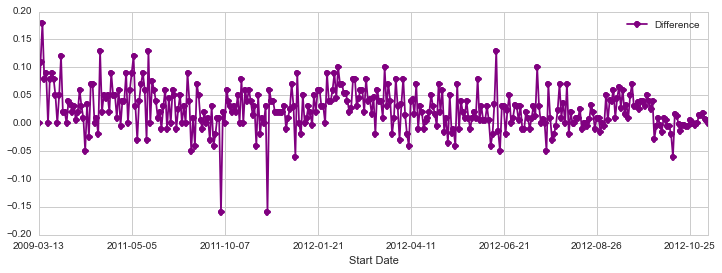

In [71]:
poll_df2 = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df2.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [113]:
row_in = 0
xlimit = []
dates = []

for date in poll_df2['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        dates.append(date)
    row_in += 1
        
print(min(xlimit))        
print(max(xlimit))        

329
356


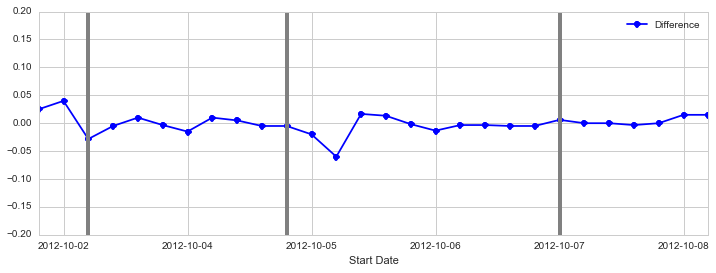

In [124]:
#poll_df2.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',linestyle='-',color='blue',xlim=(329,356))
plot = poll_df2.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',linestyle='-',color='blue')

plot.set_xlim(329,356)
plot.set_xticklabels(dates)

plt.axvline(x=329+2,linewidth=4,color='grey')
plt.axvline(x=329+10,linewidth=4,color='grey')
plt.axvline(x=329+21,linewidth=4,color='grey')


In [126]:
donor_df = pd.read_csv('data\\Election_Donor_Data.csv')

In [134]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()

In [140]:
print('The average donation was %.2f with std %.2f' %(don_mean,don_std))

The average donation was 298.24 with std 3749.67


In [146]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor = top_donor[top_donor>0]
top_donor.sort()

top_donor.value_counts().head(10)

100     178188
50      137584
25      110345
250      91182
500      57984
2500     49005
35       37237
1000     36494
10       33986
200      27813
Name: contb_receipt_amt, dtype: int64

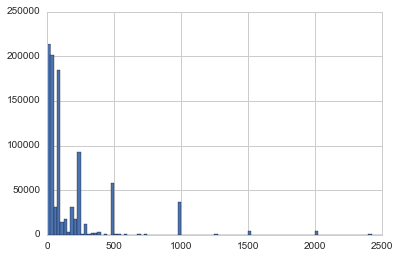

In [151]:
com_don = top_donor[top_donor < 2500]

com_don.hist(bins=100)

In [152]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [153]:
party_map = {'Bachmann, Michelle':'Republican', 
             'Romney, Mitt':'Republican', 
             'Obama, Barack':'Democrat',
             "Roemer, Charles E. 'Buddy' III":'Republican', 
             'Pawlenty, Timothy':'Republican',
             'Johnson, Gary Earl':'Republican', 
             'Paul, Ron':'Republican', 
             'Santorum, Rick':'Republican', 
             'Cain, Herman':'Republican',
             'Gingrich, Newt':'Republican', 
             'McCotter, Thaddeus G':'Republican', 
             'Huntsman, Jon':'Republican',
             'Perry, Rick':'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [154]:
donor_df.Party.unique()

array(['Republican', 'Democrat'], dtype=object)

In [156]:
donor_df = donor_df[donor_df.contb_receipt_amt>0]

In [160]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [161]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [167]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0 

for don in cand_amount:
    print('The candidate %s raised %.0f dollars' %(cand_amount.index[i],don))
    i +=1

The candidate Bachmann, Michelle raised             2711439 dollars
The candidate Cain, Herman raised             7101082 dollars
The candidate Gingrich, Newt raised             12832770 dollars
The candidate Huntsman, Jon raised             3330373 dollars
The candidate Johnson, Gary Earl raised             566962 dollars
The candidate McCotter, Thaddeus G raised             39030 dollars
The candidate Obama, Barack raised             135877427 dollars
The candidate Paul, Ron raised             21009620 dollars
The candidate Pawlenty, Timothy raised             6004819 dollars
The candidate Perry, Rick raised             20305754 dollars
The candidate Roemer, Charles E. 'Buddy' III raised             373010 dollars
The candidate Romney, Mitt raised             88335908 dollars
The candidate Santorum, Rick raised             11043159 dollars


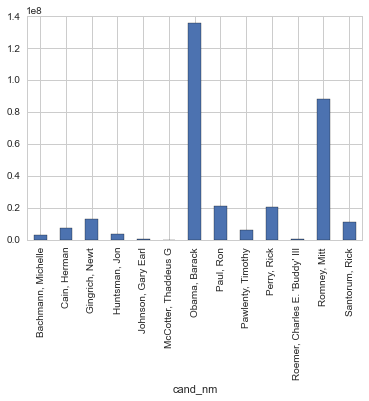

In [169]:
cand_amount.plot(kind='bar')

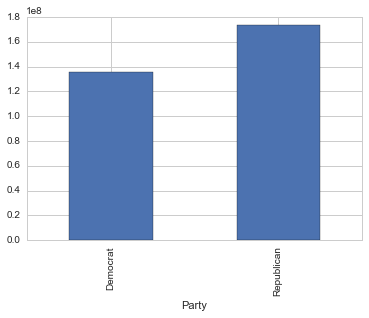

In [171]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [177]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                     index='contbr_occupation',
                                     columns='Party',
                                     aggfunc='sum')


In [180]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

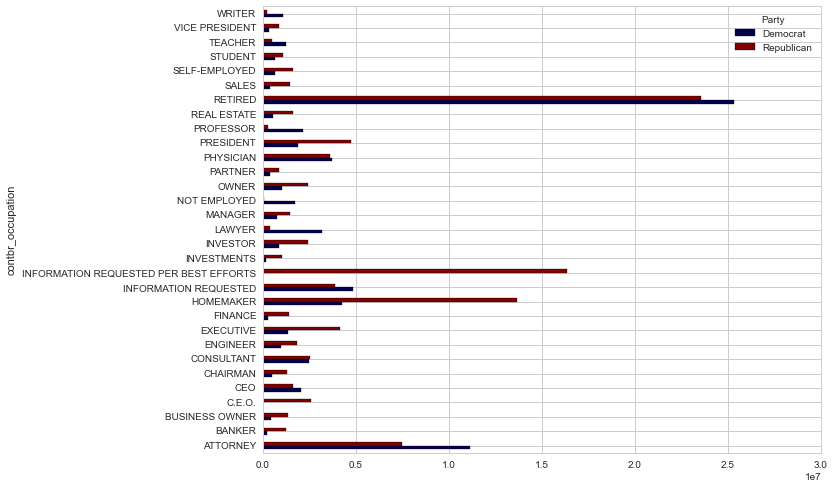

In [190]:
occupation_df.plot(kind='barh',figsize=(10,8),cmap='seismic')

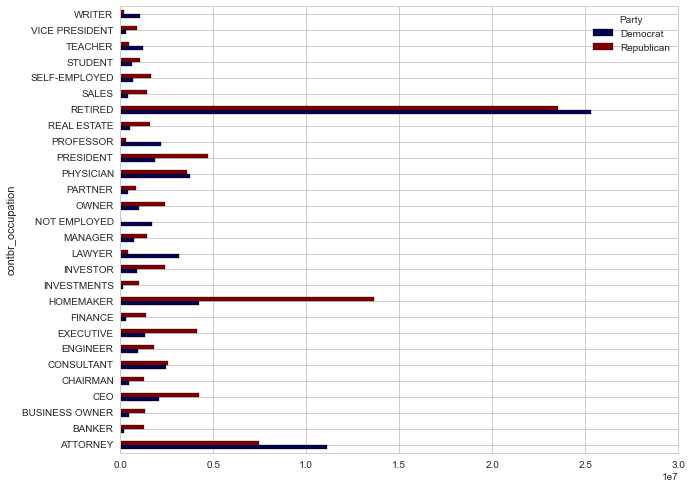

In [204]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],inplace=True)

occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.',inplace=True)

occupation_df.plot(kind='barh',figsize=(10,8),cmap='seismic')